In [9]:
import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
import torchvision.models as models
from collections import OrderedDict
import pandas as pd
from tqdm import tqdm
from torchvision import transforms
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from model import Backbone, Decoder
import yaml
from attrdict import AttrDict
from PIL import Image
import cv2
import os
from dataset import DIPLECSTrainDataset, DIPLECSTestDataset

In [13]:
train_df = pd.read_csv("PShape/valid_1315584542/1315584542.csv")[:]

with open("./hparams.yaml") as f:
    config = yaml.load(f, Loader=yaml.Loader)  # config is dict
    cfg = AttrDict(config)

train_dataset = DIPLECSTestDataset("PShape/valid_1315584542/", "1315584542", train_df)

train_loader = DataLoader(
    train_dataset, 
    batch_size=32, 
    shuffle=False, 
    drop_last=True, 
    num_workers=1, 
    pin_memory=True)

device = "cuda:0"
# os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
# backbone = Backbone(cfg.backbone).to(device)
decoder = Decoder(cfg.d_model, cfg.n_head, cfg.seq_l, cfg.stride, p=cfg.p).to(device)

data = []
    
for index, (_, last_steer) in enumerate(tqdm(train_loader)):
    
#     last_steer_cuda = last_steer.to(device)
#     steer_angles_cuda = steer_angles.to(device)
#     x = torch.rand(1,8,512).to(device)
    
    try:
        pass
#         y_hat = decoder(x, steer_angles_cuda).flatten()
    
    except Exception as err:
        print(index)
        exception_type = type(err).__name__
        print(exception_type)     
        break

100%|██████████| 42/42 [00:13<00:00,  3.16it/s]


In [11]:
stride = 0.1
bins = torch.Tensor([-1.1, -0.5, 0.5, 1.1])

steer_angles = torch.Tensor([-1.2, 0.4, 0, -0.4, 1.])
torch.bucketize(steer_angles, bins)

tensor([0, 2, 2, 2, 3])

In [42]:
df = pd.read_csv('PShape/control/1315585148.dat', sep="\s+", names=['image_id', 'throttle', 'data'])
df_mean = df.groupby('image_id').mean().reset_index()
df_mean = df_mean[:-1]
df_mean 

,image_id,throttle,data
0,Image000002.jpg,33028.0,33028.0
1,Image000003.jpg,33028.0,33028.0
2,Image000004.jpg,33028.0,33028.0
3,Image000005.jpg,33028.0,33028.0
4,Image000006.jpg,33028.0,33028.0
...,...,...,...
1344,Image001346.jpg,46550.0,33028.0
1345,Image001347.jpg,46550.0,33028.0
1346,Image001348.jpg,46550.0,33028.0
1347,Image001349.jpg,46550.0,33028.0


In [43]:
df_mean.data = ((df_mean.data - 33028.0) / 20229).round(4)
df_mean

,image_id,throttle,data
0,Image000002.jpg,33028.0,0.0
1,Image000003.jpg,33028.0,0.0
2,Image000004.jpg,33028.0,0.0
3,Image000005.jpg,33028.0,0.0
4,Image000006.jpg,33028.0,0.0
...,...,...,...
1344,Image001346.jpg,46550.0,0.0
1345,Image001347.jpg,46550.0,0.0
1346,Image001348.jpg,46550.0,0.0
1347,Image001349.jpg,46550.0,0.0


In [44]:
# norm_df.columns = ['index', 'data']
df_mean.to_csv('PShape/valid_1315585148/1315585148.csv', index=False)
# plt.figure(figsize=(16,6))
# plt.plot(norm_df)

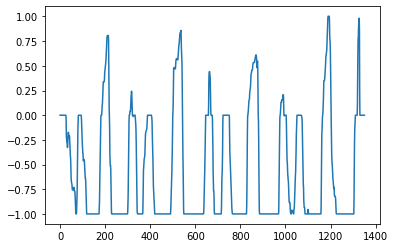

In [94]:
plt.plot(pd.read_csv('PShape/train_1315584123/1315584123.csv'))

In [31]:
decoder = Decoder(512, 4, 8)

x = torch.rand()
traced_decoder = torch.jit.script(decoder,x)

In [28]:
backbone = Backbone()
x = torch.rand(1,3,120,320)

traced_backbone = torch.jit.script(backbone,x)

/home/usrg/miniconda3/envs/robert3/lib/python3.7/site-packages/torch/jit/_script.py:891: UserWarning: `optimize` is deprecated and has no effect. Use `with torch.jit.optimized_execution() instead
  "`optimize` is deprecated and has no effect. Use `with torch.jit.optimized_execution() instead"


In [29]:
traced_backbone.save('traced_backbone.pt')

In [27]:
print(traced_backbone.backbone.code)

def forward(self,
    input: Tensor) -> Tensor:
  _0 = getattr(self, "8")
  _1 = getattr(self, "7")
  _2 = getattr(self, "6")
  _3 = getattr(self, "5")
  _4 = getattr(self, "4")
  _5 = getattr(self, "3")
  _6 = getattr(self, "2")
  _7 = (getattr(self, "1")).forward((getattr(self, "0")).forward(input, ), )
  _8 = (_4).forward((_5).forward((_6).forward(_7, ), ), )
  _9 = (_1).forward((_2).forward((_3).forward(_8, ), ), )
  return (_0).forward(_9, )



In [14]:
a = torch.rand(1, 2, 512)
attn = nn.Linear(512, 1)

w = attn(a)
w = torch.softmax(w, dim=1)

(w * a).sum(1).shape, w, a


(torch.Size([1, 512]),
 tensor([[[0.6358],
          [0.3642]]], grad_fn=<SoftmaxBackward>),
 tensor([[[0.2704, 0.3671, 0.5535,  ..., 0.9551, 0.5247, 0.9945],
          [0.3041, 0.7091, 0.6334,  ..., 0.6189, 0.0084, 0.8809]]]))

In [57]:
# df = pd.read_csv('data/val.csv')
# df = (df - 1500) / 400
# df.to_csv('data/val_norm.csv', index=False)

In [58]:
df = pd.read_csv('data/val_norm.csv')
x = torch.from_numpy(df.to_numpy())
data = x.flatten().float()

,data
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
3396,0.0
3397,0.0
3398,0.0
3399,0.0


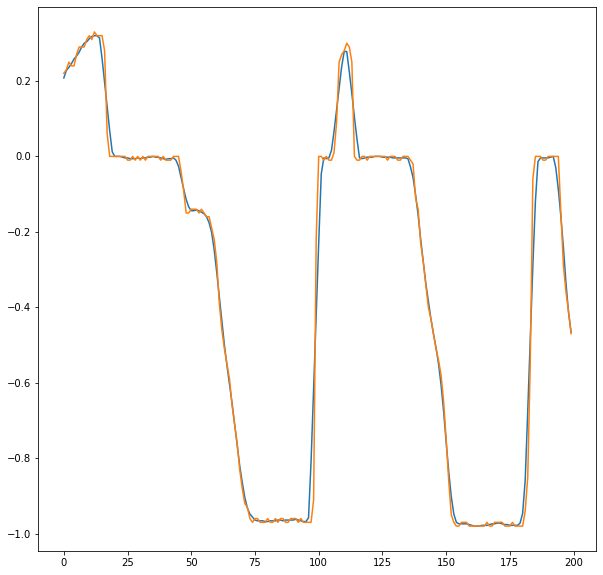

In [60]:
kernel = 5
padding = kernel // 2
conv = nn.Conv1d(1, 1, kernel_size=kernel, stride=1, padding=padding, bias=False)

# filt = torch.FloatTensor([0.6, 1, 1.0, 1, 0.3])
# filt = filt / filt.sum()
# conv.weight = torch.nn.Parameter(filt[None, None, :])

conv.weight = torch.nn.Parameter(torch.ones(kernel)[None, None, :] / kernel)

conv.require_grad = False

x = conv(data.unsqueeze(0).unsqueeze(0))[0,0,:]
x = x.detach().numpy()

# denoised = pd.DataFrame(x, columns=["data"]).round(2)
# denoised.to_csv('data/val_norm_denoised.csv', index=False)
s = 100
e = 300
figure(figsize=(10,10))
plt.plot(x[s:e]), plt.plot(data[s:e])
denoised

In [153]:
mask = torch.full((seq_l, seq_l), True)
mask = torch.triu(mask).T
mask

tensor([[ True, False, False, False, False, False, False, False],
        [ True,  True, False, False, False, False, False, False],
        [ True,  True,  True, False, False, False, False, False],
        [ True,  True,  True,  True, False, False, False, False],
        [ True,  True,  True,  True,  True, False, False, False],
        [ True,  True,  True,  True,  True,  True, False, False],
        [ True,  True,  True,  True,  True,  True,  True, False],
        [ True,  True,  True,  True,  True,  True,  True,  True]])

In [154]:
class Encoder(nn.Module):
    def __init__(self, d_model: int, n_head: int, seq_l: int):
        super(Encoder, self).__init__()
        
        resnet = models.resnet18(pretrained=False) 
        self.resnet = nn.Sequential(*list(resnet.children())[:-1])
        
        self.pos_emb = nn.Embedding(seq_l, d_model)
        
        mask = torch.full((seq_l, seq_l), float('-inf'))
        mask = torch.triu(mask)
        
        self.transformer = ResidualAttentionBlock(d_model, n_head, mask)
        
        self.fc = nn.Sequential(
            nn.Linear(d_model, 1),
            nn.Tanh())
        
    def forward(self, X):
        
        t = X.size(1)
        
        r = []
        
        for i in range(t):
            
            x = X[:,i,:,:,:]
            x = self.resnet(x)
            print(x.shape)
            x = x.squeeze(3).squeeze(2)

            x = x + self.pos_emb(torch.LongTensor([i]))
            
            r.append(x)
        
        X = torch.stack(r,dim=1) # (batch_size, L, d_model)
        
        X = X.transpose(0,1) # (L, batch_size, d_model)    
        

        X = self.transformer(X)
        X = X.transpose(0,1) # (batch_size, L, d_model)
        print(X.shape)
        X = X[:,-1,:]
        X = self.fc(X)
        
        return X

In [155]:
d_model = 512
n_head = 4
seq_l = 8

encoder = Encoder(d_model, n_head, seq_l)

x = torch.rand(1,seq_l,3,120,320)

encoder(x)

torch.Size([1, 512, 1, 1])
torch.Size([1, 512, 1, 1])
torch.Size([1, 512, 1, 1])
torch.Size([1, 512, 1, 1])
torch.Size([1, 512, 1, 1])
torch.Size([1, 512, 1, 1])
torch.Size([1, 512, 1, 1])
torch.Size([1, 512, 1, 1])
torch.Size([1, 8, 512])


tensor([[0.2588]], grad_fn=<TanhBackward>)

-0.61
-0.63
-0.65
-0.66
-0.67
-0.69
-0.71
-0.74
-0.76
-0.79
-0.8
-0.82
-0.82
-0.83
-0.83
-0.84
-0.85
-0.87
-0.89
-0.91
-0.93
-0.95
-0.96
-0.96
-0.96
-0.96
-0.96
-0.96
-0.96
-0.96
-0.96
-0.96
-0.96
-0.96
-0.96
-0.96
[-0.61, -0.63, -0.65, -0.66, -0.67, -0.69, -0.71, -0.74, -0.76, -0.79, -0.8, -0.82, -0.82, -0.83, -0.83, -0.84, -0.85, -0.87, -0.89, -0.91, -0.93, -0.95, -0.96, -0.96, -0.96, -0.96, -0.96, -0.96, -0.96, -0.96, -0.96, -0.96, -0.96, -0.96, -0.96]


/home/usrg/miniconda3/envs/robert3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


tensor([-0.9600])

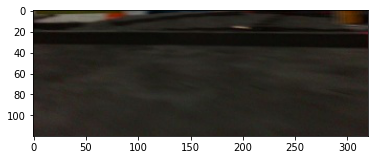

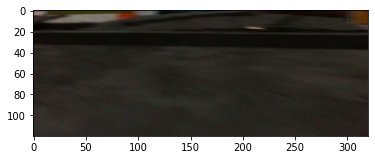

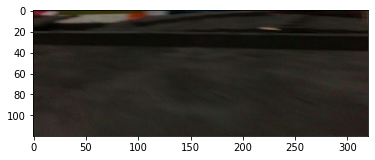

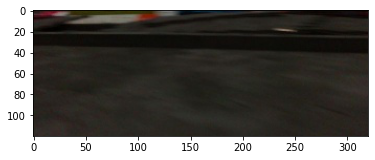

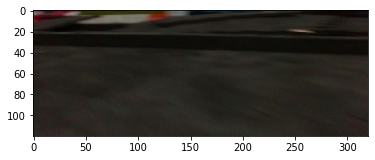

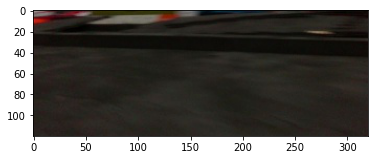

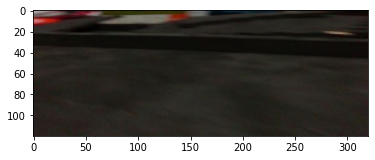

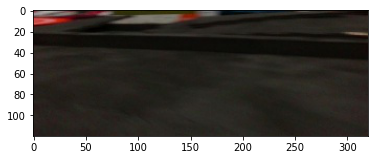

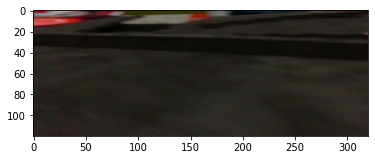

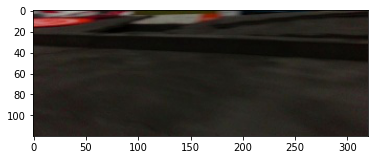

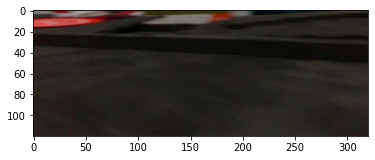

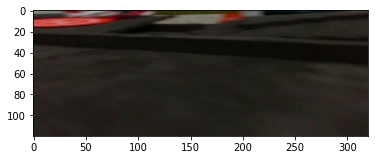

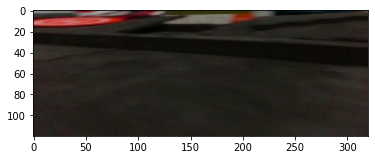

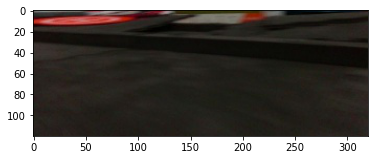

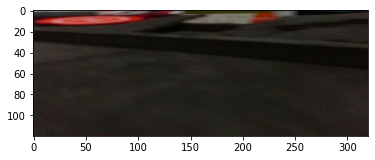

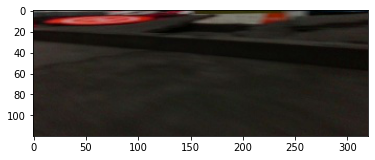

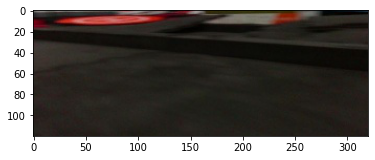

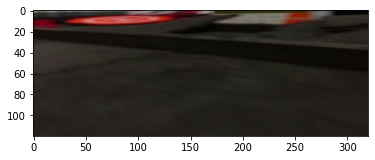

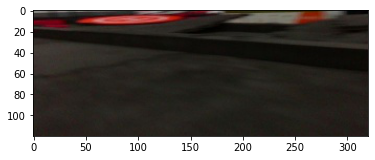

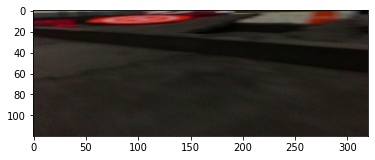

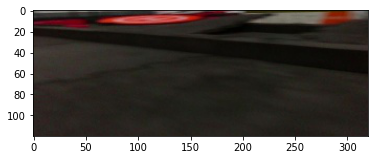

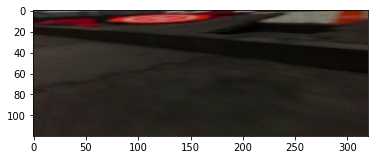

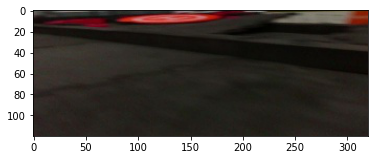

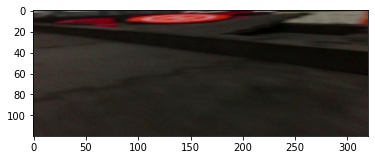

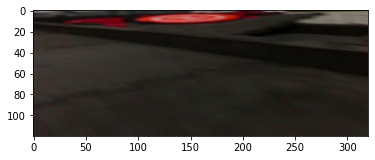

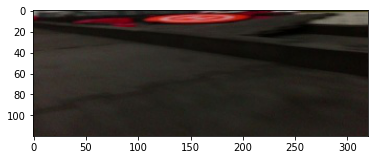

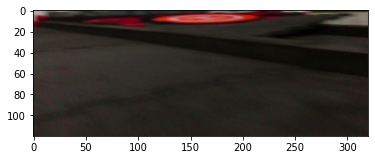

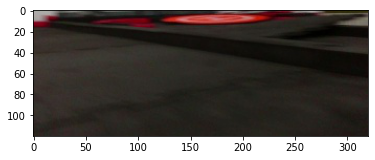

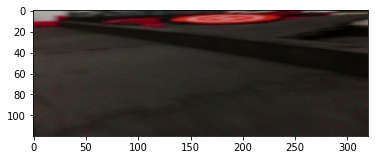

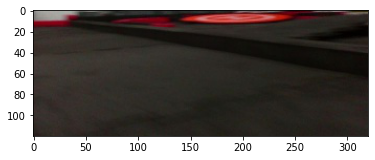

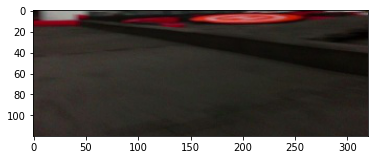

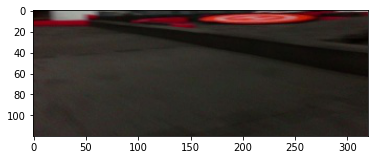

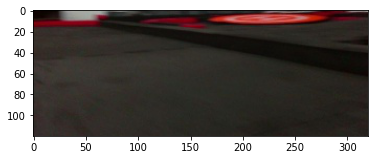

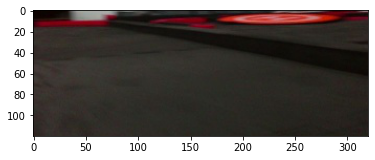

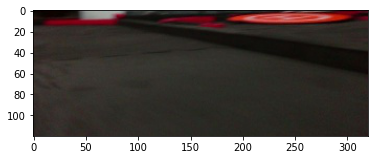

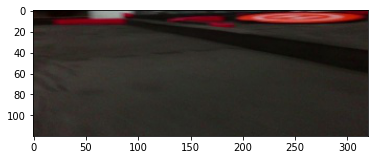

In [25]:
from config import CONFIG

skip = 4

class TrainDataset(Dataset):

    def __init__(self, data_dir, df, seq_l, train=True):

        self.data_dir = data_dir
        
        self.df = df
        self.shifted_df = df[seq_l - 1 + (seq_l - 1)*skip:].reset_index()
        self.seq_l = seq_l
        self.train = train
        
        self.train_tf = transforms.Compose([
            transforms.ColorJitter(brightness=0.05, contrast=0.1),
#             transforms.RandomCut(4)
        ])
    
        
        self.transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])
        
        self.bins = np.arange(-1-CONFIG.stride/2,1+CONFIG.stride/2, CONFIG.stride)
        
    def __len__(self):
        return len(self.shifted_df)
     
    def __getitem__(self, index):
        
        start_index = self.shifted_df['index'].iloc[index]
        
        X = []
        all_steer = []

        for i in reversed(range(self.seq_l + (self.seq_l - 1)*skip)):
            
            all_steer.append(self.df.data.loc[start_index - i])
            
            img_index = str(start_index - i).zfill(4)
            img = Image.open(self.data_dir + img_index + '.jpg')
            
            plt.figure(figsize=(6,12))
            plt.imshow(img)
            print(self.df.data.loc[start_index - i])
            x = self.transform(img)
            X.append(x)
        
        X = torch.stack(X, dim=0)
        
        print(all_steer[:-1])
        
        digitized = torch.LongTensor(np.digitize(all_steer[:-1], self.bins)) + 1

        last_steer = torch.FloatTensor([all_steer[-1]])
        
        return X, last_steer, digitized

    
df = pd.read_csv('data/train_norm_denoised.csv')

train_dataset = TrainDataset('data/train/', df, 8)
train_dataset[220][1]

# train_loader = DataLoader(
#     train_dataset, 
#     batch_size=batch_size, 
#     shuffle=True, 
#     drop_last=True, 
#     num_workers=num_workers, 
#     pin_memory=True)

# next(iter(train_dataset))[0].shape